# Visualize estimated parameters

In [1]:
var {
    ls,
    read,
    fetchData,
    getSummarizedParameters,
    groupEachStage,
    palette,
    integratedLiquidLine,
    Plotly,
    sampleMeltComposition
} = require("./show-magma-model")

var funcTools = require("../../jslib/funcTools")
var fs = require("fs")
var spread = funcTools.spread;

var fontMaker = (fontSize) => {
    return {
        family: 'sans-serif',
        size: fontSize,
        color: '#000'
    }
}

var middiumSize = {
    width : 800,
    height : 600
}

var largeSize = {
    width : 1000,
    height : 750
}

var legend= (normalOrder = true) => {
    return {
        legend: {
            traceorder : (normalOrder)? "normal" : "reversed" ,
            font: fontMaker(20)
        }
    }
    
}


var axis = (direction,title,range) => {
    const obj = {}
    obj[direction+"axis"] = {
        title : title, 
        titlefont:fontMaker(24),
        tickfont : fontMaker(18)
    };
    if (range !== undefined) obj[direction+"axis"].range = range;
    return obj
}

DEPLICATED: use 'textParser.js' instead of 'textFile.js'.


Directory

```
/diffusion
/phase
/ptmcmc
    /model
    /tool
    /result
    
```

In [2]:
var resultPath = "../results/2018-0726/"

var dataPath = "../model/"
var lavaPath = "../../phase/data/lava_compositions_mafic_NEshikoku.csv"
var opxPath = "../../phase/data/opx_zoning_compile.csv"

In [3]:
var {
    meta,
    data,
    error,
    option,
    summary
} = fetchData(resultPath,dataPath)

var {
      model,
      parameters,
      updateCondition,
      constrain,
      magma
    } = require("../"+meta.model)(option)

var cmap = palette("tol-rainbow", parameters.length)

var lava = read.csv(lavaPath)
var opx = read.csv(opxPath)



Summary column [ '', 'parameter', 'mean', 'stdev', 'mode', 'max_P' ]


In [4]:
var summarizedParameters = getSummarizedParameters(summary, "mean", parameters);
var parametersEachStage = groupEachStage(summarizedParameters)

console.table(Object.entries(summarizedParameters[0]))

┌─────────┬──────────────────────────────────────┬────────────────────────┐
│ (index) │                  0                   │           1            │
├─────────┼──────────────────────────────────────┼────────────────────────┤
│    0    │     'MgN_beforeCrystallization'      │  '92.18441917021731'   │
│    1    │ 'growth_stoichiometry_orthopyroxene' │ '0.42774128760735824'  │
│    2    │    'growth_stoichiometry_spinel'     │ '0.04272146909644916'  │
│    3    │          'MgN_beforeMixing'          │  '91.71241293469063'   │
│    4    │ 'mixing_stoichiometry_orthopyroxene' │  '0.4632388167974419'  │
│    5    │    'mixing_stoichiometry_spinel'     │ '0.057774759950495504' │
│    6    │             'log10_tau'              │  '7.988334314982495'   │
└─────────┴──────────────────────────────────────┴────────────────────────┘


In [5]:
console.log(spread)

[Function: spread]


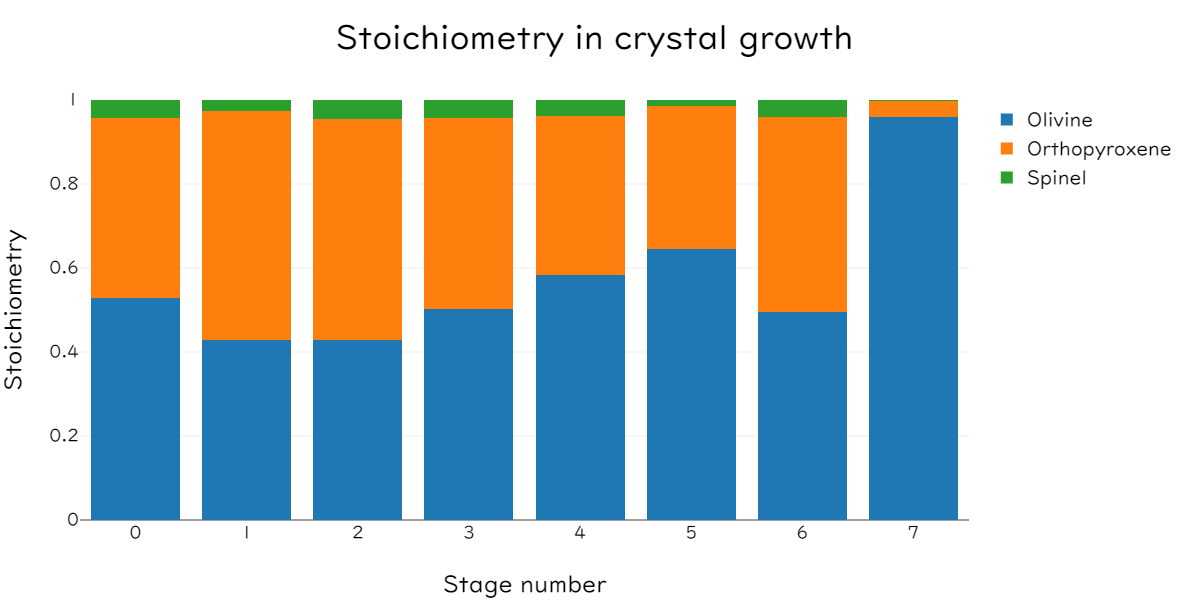

In [6]:
Plotly([
    {
        y : funcTools.zipWith((x,y)=>1-x-y)
            (parametersEachStage.growth_stoichiometry_orthopyroxene)
            (parametersEachStage.growth_stoichiometry_spinel),
        name : "Olivine",
        type:"bar"
    },
    {
        y : parametersEachStage.growth_stoichiometry_orthopyroxene,
        name : "Orthopyroxene",
        type:"bar"
    },
    {
        y : parametersEachStage.growth_stoichiometry_spinel,
        name : "Spinel",
        type:"bar"
    }
],
spread(
    middiumSize,
    legend(),
    axis("x", "Stage number"),
    axis("y", "Stoichiometry", [0,1]),
    {
        barmode: "stack",
        title : "Stoichiometry in crystal growth",
        font : fontMaker(24)
    }
))

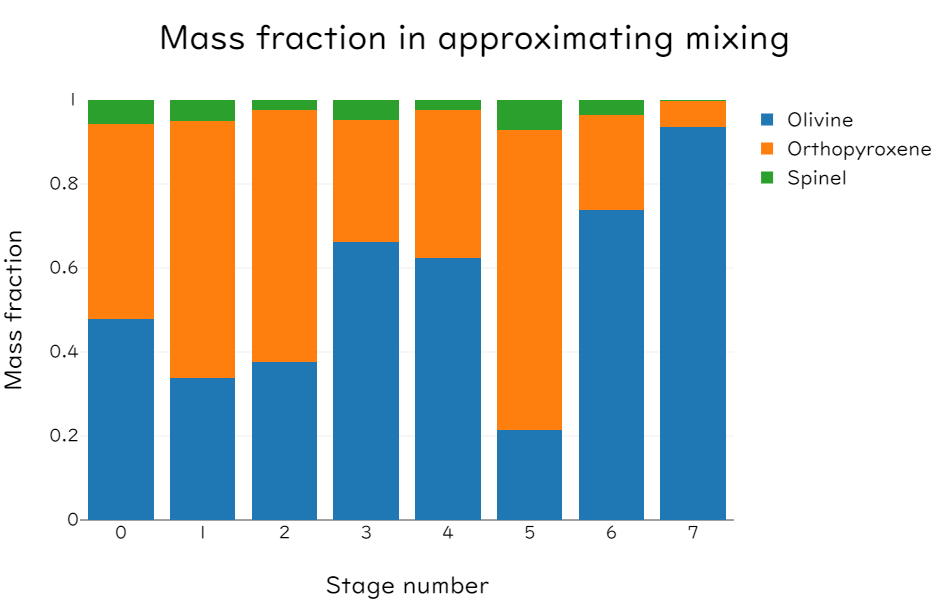

In [10]:
Plotly([
    {
        y : funcTools.zipWith((x,y)=>1-x-y)
            (parametersEachStage.mixing_stoichiometry_orthopyroxene)
            (parametersEachStage.mixing_stoichiometry_spinel),
        name : "Olivine",
        type:"bar"
    },
    {
        y : parametersEachStage.mixing_stoichiometry_orthopyroxene,
        name : "Orthopyroxene",
        type : "bar"
    },
    {
        y : parametersEachStage.mixing_stoichiometry_spinel,
        name : "Spinel",
        type : "bar"
    }
],
spread(
    middiumSize,
    legend(),
    axis("x", "Stage number"),
    axis("y", "Mass fraction", [0,1]),
    {
        barmode: "stack",
        title : "Mass fraction in approximating mixing",
        font : fontMaker(24)
    }
)
)


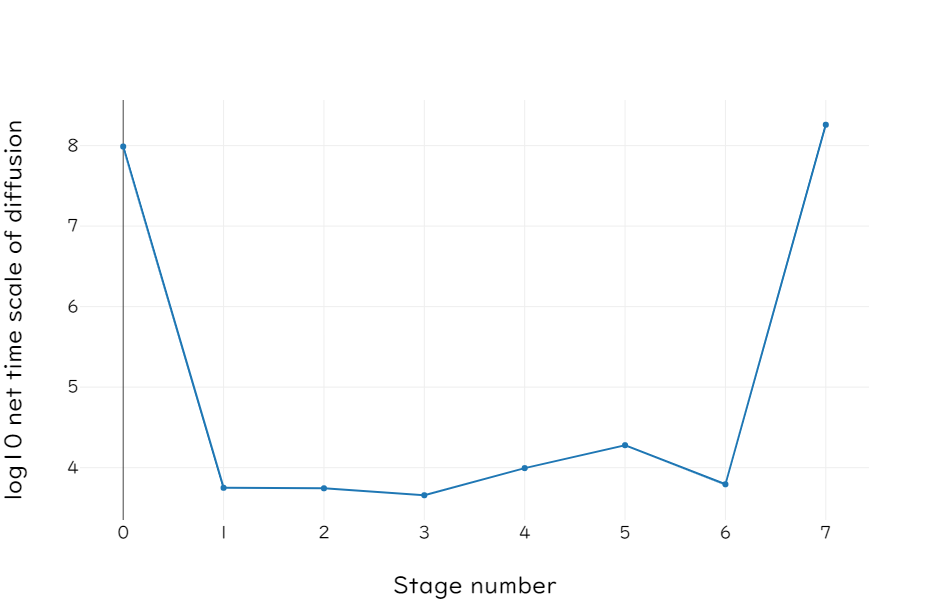

In [11]:
Plotly([
    {
        y : parametersEachStage.log10_tau
    }
],
spread(
    middiumSize,
    legend(),
    axis("x", "Stage number"),
    axis("y", "log10 net time scale of diffusion"),
    {
        title : ""
    }
)
)

## Modeled chemical profile

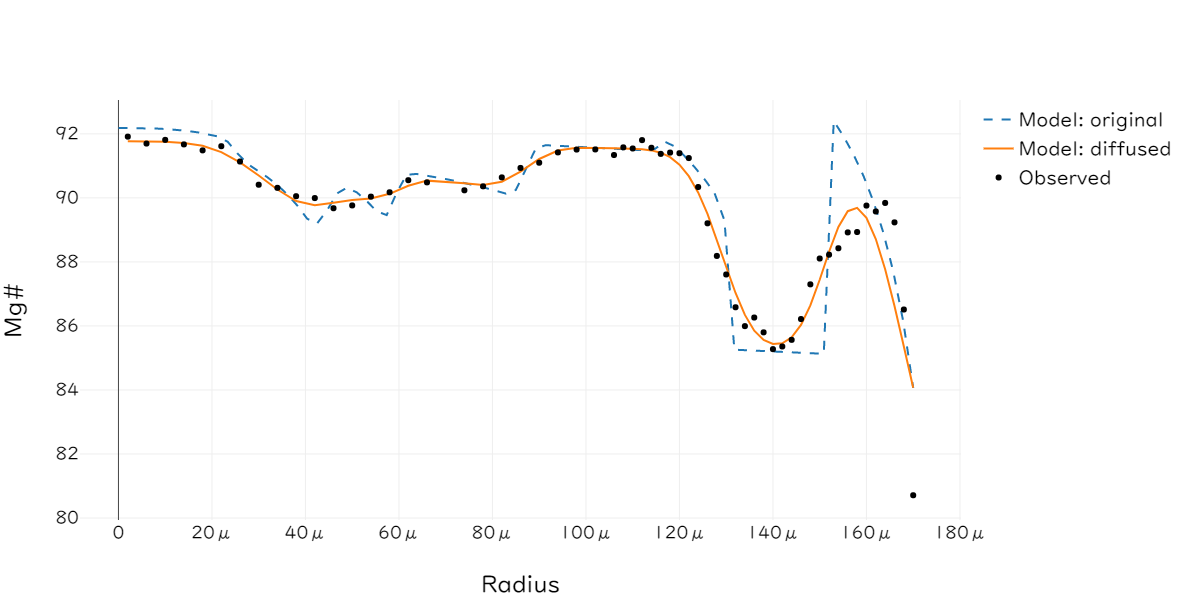

In [7]:
var modeled = model(summarizedParameters,data)
var ndProfiles = magma.diffusionProfiles.orthopyroxene;

var ndFe_Mg = ndProfiles.Fe_Mg.notDiffusedProfile.get()

Plotly([
    {
        x : ndFe_Mg.x,
        y : ndFe_Mg.c.map(v=>100/(1+v)),
        name : "Model: original",
        line : {
            dash : "dash"
        }
    },
    {
        x : modeled.x,
        y : modeled.Fe_Mg.map(v=>100/(1+v)),
        name : "Model: diffused"
    },
     
    {
        x : data.x,
        y : data.Fe_Mg.map(v=>100/(1+parseFloat(v))),
        mode : "markers",
        name : "Observed",
        marker : {
            color : "black"
        }
    }

],
spread(
    middiumSize,
    legend(),
    axis("x","Radius"),
    axis("y","Mg#")
)
)

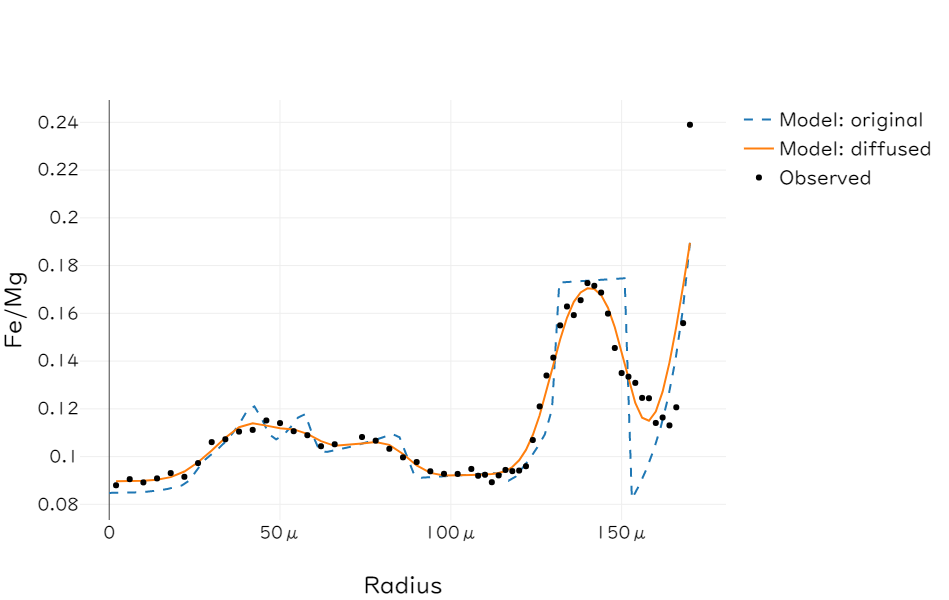

In [13]:
var modeled = model(summarizedParameters,data)
var ndProfiles = magma.diffusionProfiles.orthopyroxene;

var ndFe_Mg = ndProfiles.Fe_Mg.notDiffusedProfile.get()

Plotly([
    {
        x : ndFe_Mg.x,
        y : ndFe_Mg.c,
        name : "Model: original",
        line : {
            dash : "dash"
        }
    },
    {
        x : modeled.x,
        y : modeled.Fe_Mg,
        name : "Model: diffused"
    },
     
    {
        x : data.x,
        y : data.Fe_Mg,
        mode : "markers",
        name : "Observed",
        marker : {
            color : "black"
        }
    }

],
spread(
    middiumSize,
    legend(),
    axis("x","Radius"),
    axis("y","Fe/Mg")
))

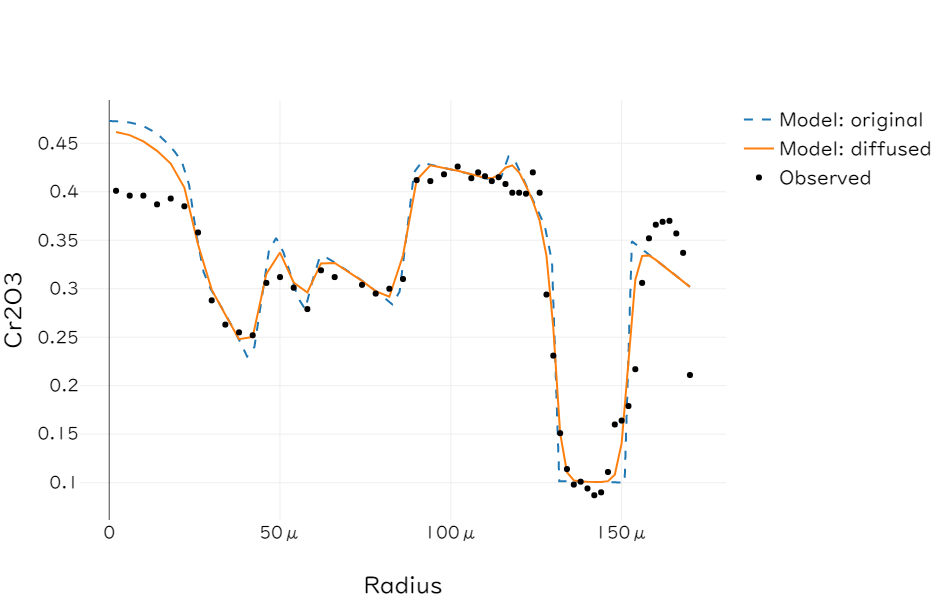

In [14]:
var ndCr2O3 = ndProfiles.Cr2O3.notDiffusedProfile.get()

Plotly([
    {
        x : ndCr2O3.x,
        y : ndCr2O3.c,
        name : "Model: original",
        line : {
            dash : "dash"
        }
    },
    {
        x : modeled.x,
        y : modeled.Cr2O3,
        name : "Model: diffused"
    },
    {
        x : data.x,
        y : data.Cr2O3,
        mode : "markers",
        name : "Observed",
        marker : {
            color : "black"
        }
    }

],
spread(
    middiumSize,
    legend(),
    axis("x","Radius"),
    axis("y","Cr2O3")
))

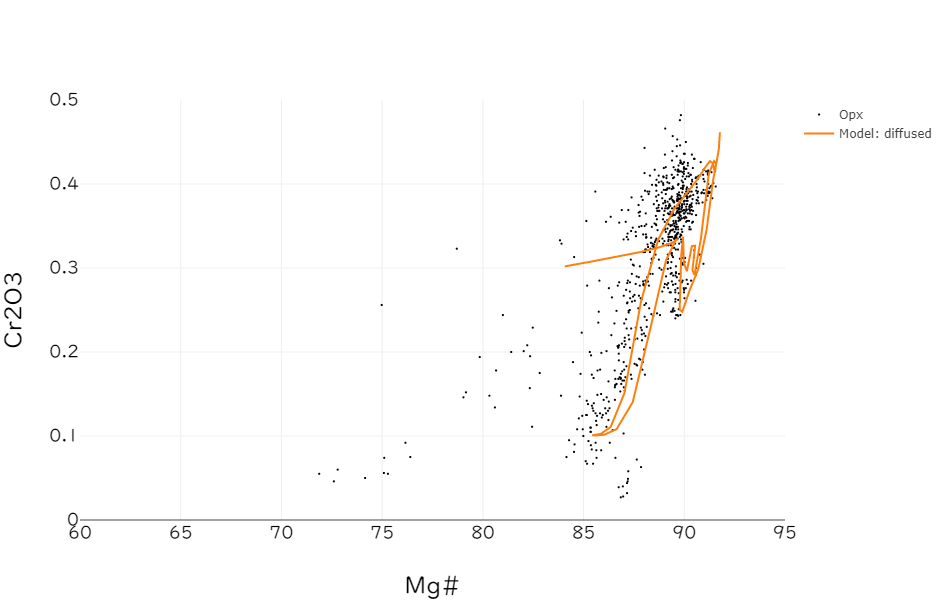

In [15]:
Plotly(
    [
        {
            x : opx.Fe_Mg.map(v=>100/(1+parseFloat(v))),
            y : opx.Cr2O3,
            name : "Opx",
            mode : "markers",
            marker : {
                color : "black",
                size : 2
            }
        },
        {
            x : modeled.Fe_Mg.map(v=>100/(1+v)),
            y : modeled.Cr2O3,
            name : "Model: diffused"
        },
        /*{
            x : ndFe_Mg.c.map(v=>100/(1+v)),
            y : ndCr2O3.c,
            name : "Model: original"
        },*/
    ],
    spread(
        middiumSize,
        axis("x","Mg#",[60,95]),
        axis("y","Cr2O3",[0,0.5])
    )
)

## Trace of the host melt composition

In [16]:

var liquidLine = integratedLiquidLine(magma,cmap)

//console.log(liquidLine("SiO2","MgO"))


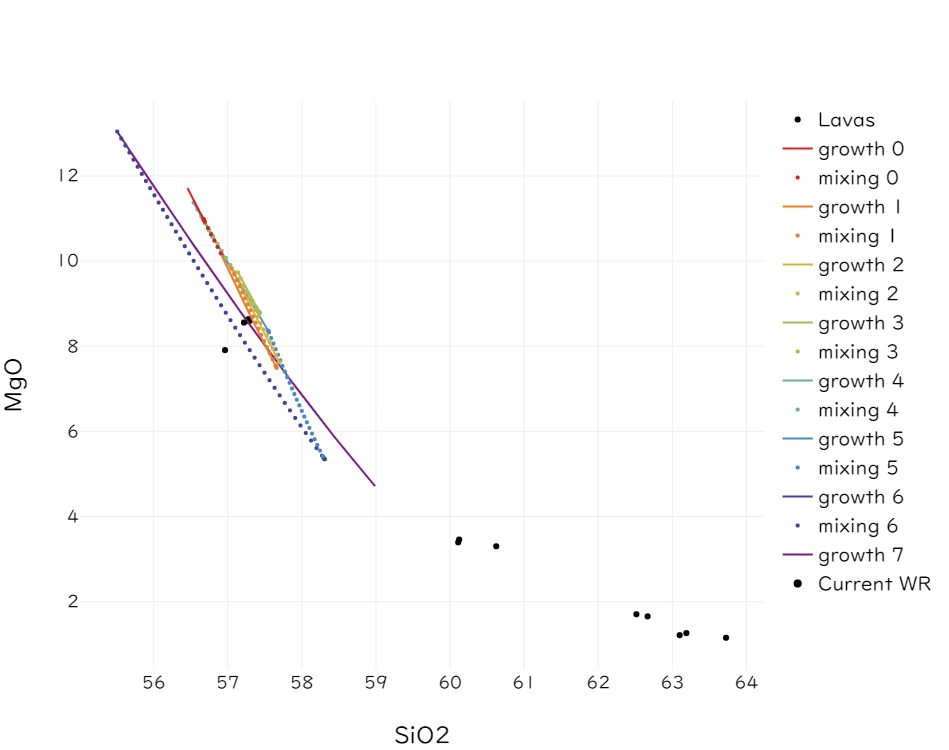

In [17]:

Plotly(
    [
        ...liquidLine("SiO2","MgO"),
        {
            x : lava.SiO2,
            y : lava.MgO,
            mode : "markers",
            marker: {
                color : "black"
            },
            name : "Lavas"
        }
    ],
    spread(
        largeSize,
        legend(false),
        axis("x","SiO2"),
        axis("y","MgO")
    )      
)


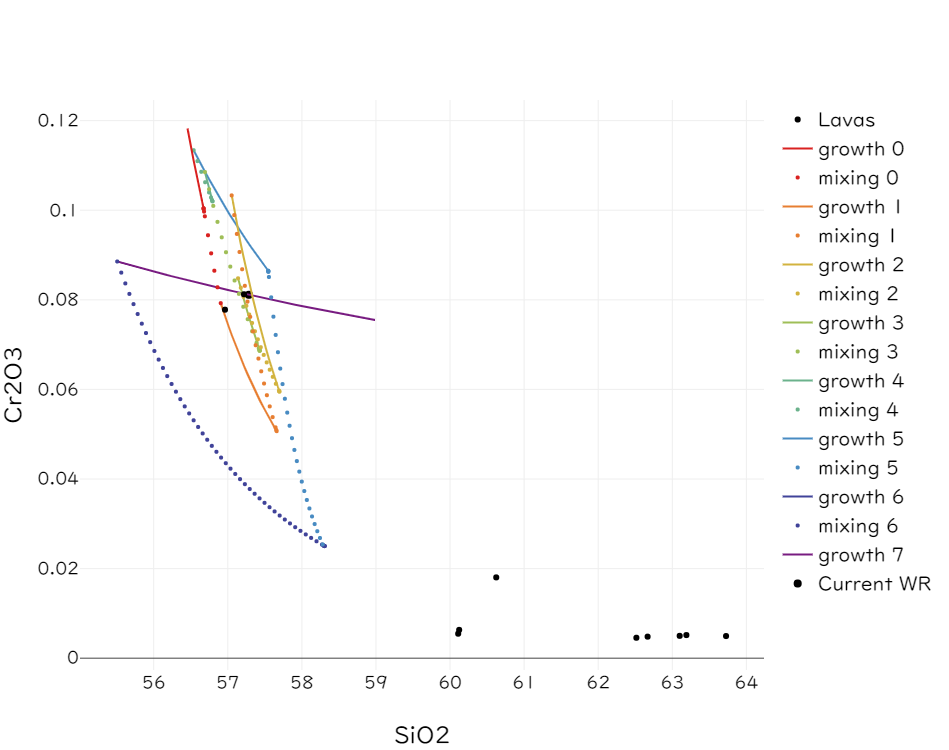

In [18]:
Plotly(
    [
        ...liquidLine("SiO2","Cr2O3"),
        {
            x : lava.SiO2,
            y : lava.Cr2O3,
            mode : "markers",
            marker: {
                color : "black"
            },
            name : "Lavas"
        }
    ],
    spread(
        largeSize,
        legend(false),
        axis("x","SiO2"),
        axis("y","Cr2O3")
    )
)


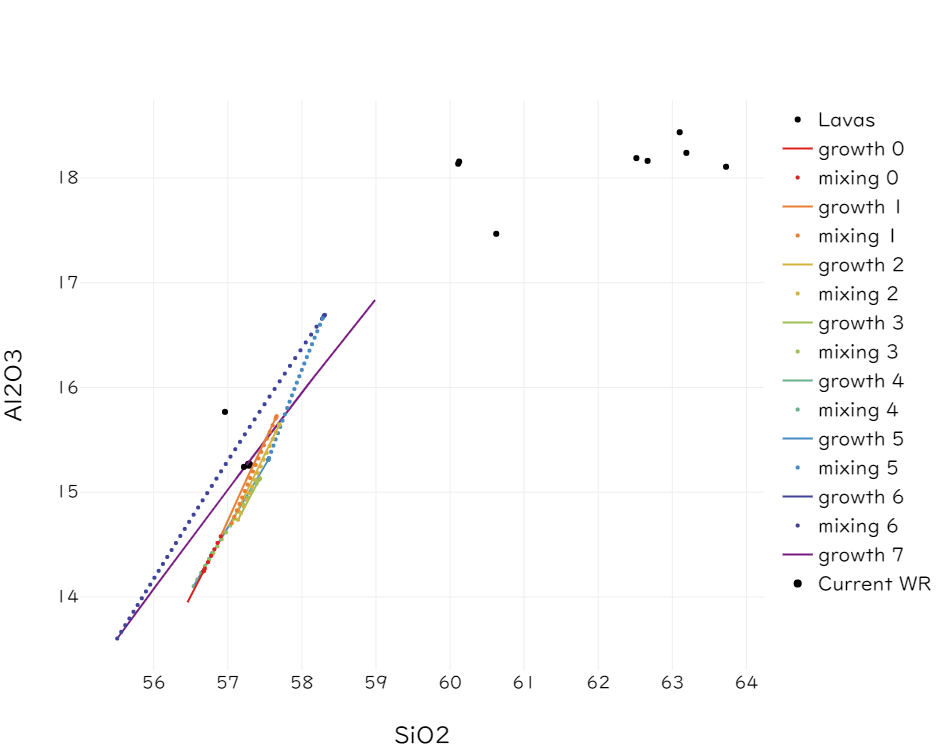

In [19]:

Plotly(
    [
        ...liquidLine("SiO2","Al2O3"),
        {
            x : lava.SiO2,
            y : lava.Al2O3,
            mode : "markers",
            marker: {
                color : "black"
            },
            name : "Lavas"
        }
    ],
spread(
    largeSize,
    legend(false),
    axis("x","SiO2"),
    axis("y","Al2O3")
)      
)

In [20]:

var parametersPath = ls(resultPath)(path=>file=>fs.statSync(path + file).isFile() && /^sample.*\.csv$/.test(file))
var df_parameters = read.csv(parametersPath.directory+parametersPath.files[1])

sampleMeltComposition(df_parameters,0,model,data,"z:/")

Fulfilled
